<a href="https://colab.research.google.com/github/poojakota17/Data-Mining-255/blob/Clustering/Different_Clustering_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective : Implement various clustering algorithms in colabs

> Link to dataset : https://drive.google.com/drive/u/1/folders/1zCTTgGxLxQZzX8_f4ZXnlWtwNA7jS5Oa

> The dataset consists of medical records of people which helps them into cluster into whether they have a heart disease or not.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction (1).csv


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import io
import seaborn as sns 

> This is how the dataset looks like

In [17]:
df = pd.read_csv(io.StringIO(uploaded['Heart_Disease_Prediction.csv'].decode('utf-8')))
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

# Visualizations

## Gender count in the dataset

In [7]:
import plotly.express as px
gender_counts = df.Sex.value_counts()
fig = px.pie(gender_counts, title='Gender Ratio', values='Sex', names=['Male', 'Female'], hole=0.5)
fig.show()

## Distribution of Age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



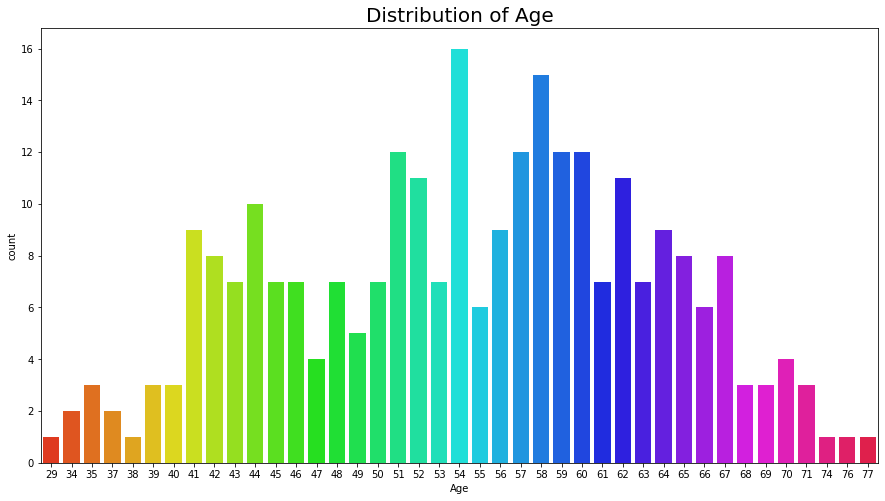

In [10]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

## Age, BP and Cholesterol distribution over gender.

In [11]:
fig = px.scatter_matrix(df,
    dimensions=['Age', 'BP', 'Cholesterol'],
    color="Sex")
fig.show()

# Principal Component Analysis

> Since the data has 12 columns, the dimensions are reduced to 2 using PCA.

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

pca=PCA(2)
x = df.iloc[:,0:12].values
# x=standardscaler.fit_transform(x)
data = pca.fit_transform(x)

In [12]:
print(data.shape)

(270, 2)


> From the below plot we can see that the 2 PCA's covers 90% variance.

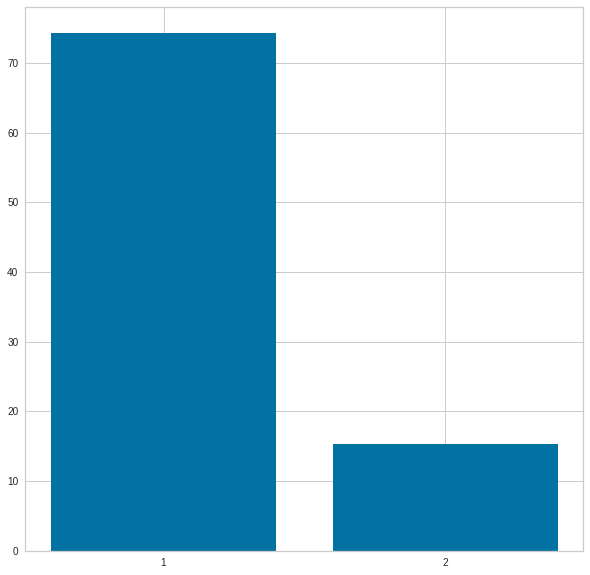

In [19]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

With 2 PCAs we are able to cover 90% variance.

# K-means from scratch

Created a kmeans_clustering function to run from scratch until the centroids stabilizes.

In [22]:
from sklearn.metrics import pairwise_distances_argmin

def kmeans_clustering(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    random_seed = np.random.RandomState(rseed)
    i = random_seed.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
      labels = pairwise_distances_argmin(X, centers)
      new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
      if np.all(centers == new_centers):
            break
      centers = new_centers
    
    return centers, labels

> Calling the function with number of clusters=2, since we need to clusters the number of poeple into 2 clusters : poeple with heart disease and people without.

In [23]:
centers, labels = kmeans_clustering(data, 2)

> The below plot shows 2 clusters with the left cluster with people with no heart disease and the right cluster are people with heart disease.

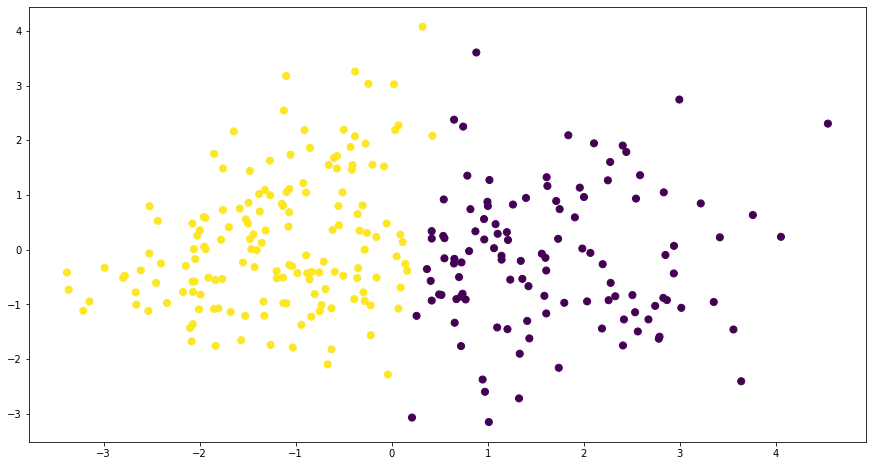

In [45]:
plt.scatter(data[:,0], data[:,1], c=labels,
            s=50, cmap='viridis');

### Silhouette Score And Davies_bouldin Score

In [44]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouetteScore=silhouette_score(data,labels)
print(silhouetteScore)

0.42022383038142924


In [24]:
from sklearn.metrics import davies_bouldin_score
db_Score=davies_bouldin_score(data, labels)
print(db_Score)

0.8492748319406547


# Gaussian Mixture model

In [61]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2,covariance_type='full')
gmm.fit(data)
labels = gmm.predict(data)

### Silhouette Score And Davies_bouldin Score

In [49]:
silhouetteScore=silhouette_score(data,labels)
print(silhouetteScore)

0.4083362071607086


In [62]:
db_Score=davies_bouldin_score(data, labels)
print(db_Score)

0.9682629329190545


> The below plot shows 2 clusters with the left cluster with people with no heart disease and the right cluster are people with heart disease.

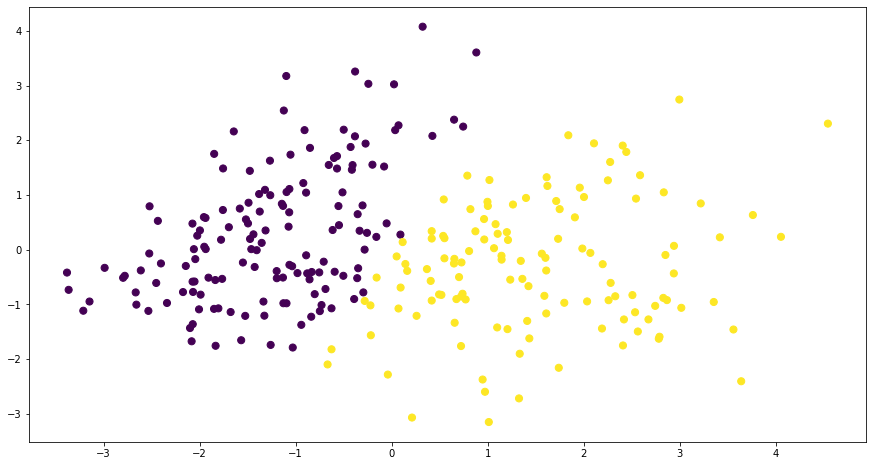

In [50]:
plt.scatter(data[:,0], data[:,1], c=labels,
            s=50, cmap='viridis');

# Heirarchical Clustering

In [54]:
import scipy.cluster.hierarchy as sch
import plotly.figure_factory as ff
fig = ff.create_dendrogram(data,
                           linkagefun = lambda x: sch.linkage(x, "ward"),)

fig.update_layout(title = 'Hierarchical Clustering', 
                   yaxis_title='Euclidean Distance', width=700, height=700)

fig.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(data)


> The below plot shows 2 clusters with the left cluster with people with no heart disease and the right cluster are people with heart disease.

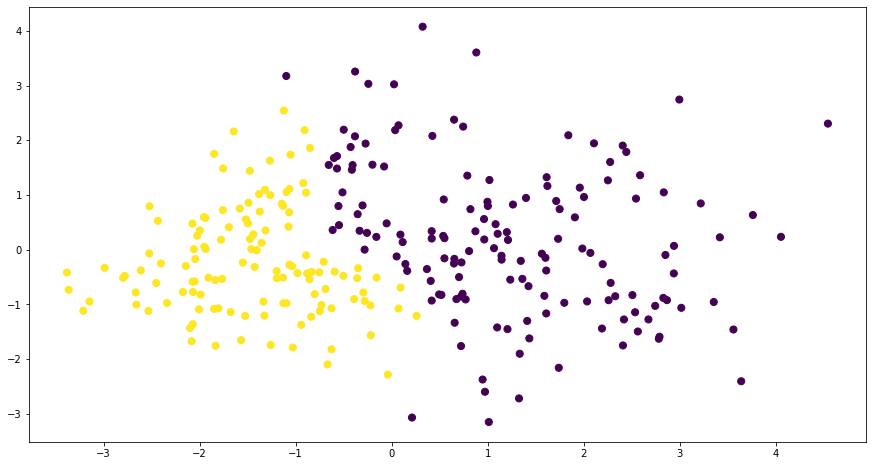

In [59]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_,
            s=50, cmap='viridis');

### Silhouette Score And Davies_bouldin Score

In [58]:
silhouetteScore=silhouette_score(data,clustering.labels_)
print(silhouetteScore)

0.3683675782637907


In [26]:
db_Score=davies_bouldin_score(data, clustering.labels_)
print(db_Score)

0.9163537279458722


# DBSCAN using pycaret 

> Install the pycaret library

In [ ]:
!pip install pycaret

> Setup the dataset and train the model for dbscan

In [14]:
from pycaret.clustering import *
df_dbscan = pd.DataFrame(data, columns = ['PCA1','PCA2'])
exp_name = setup(data = df_dbscan)
dbscan = create_model('dbscan',num_clusters = 2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.291,10.604,3.5486,0,0,0


> The above results shows metrics for dbscan algorithm.

> Through dbscan the clusters are not demarcated properly.

In [15]:
plot_model(dbscan,'cluster')

# Results and Comparison

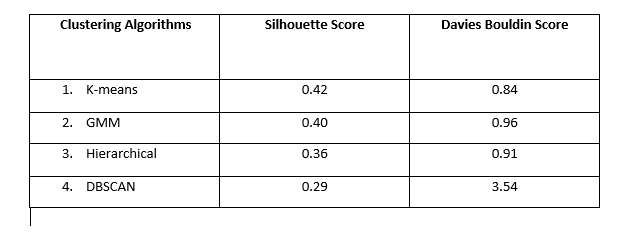

> The better algorithm which worked for this dataset is k-means